In [1]:
(None, None)

(None, None)

In [2]:
def BTiter(n):
    if n == 0:
        yield None
    else:
        for i in range(n):
            for g in BTiter(i):
                for d in BTiter(n-i-1):
                    yield (g, d)

In [3]:
list(BTiter(3))

[(None, (None, (None, None))),
 (None, ((None, None), None)),
 ((None, None), (None, None)),
 ((None, (None, None)), None),
 (((None, None), None), None)]

In [4]:
[len(list(BTiter(i))) for i in range(10)]

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]

In [5]:
@cached_function
def catalan(n):
    if n == 0:
        return 1
    else:
        return sum(catalan(i)*catalan(n-1-i) for i in range(n))

In [6]:
[catalan(n) for n in range(10)]

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]

In [7]:
def BTunrank(n, r):
    if n == 0:
        if r == 0:
            return None
        else:
            raise IndexError
    iblock = 0
    tailleg = catalan(iblock)
    tailled = catalan(n - 1 - iblock)
    while r >= tailleg * tailled:
        r -= tailleg * tailled
        iblock += 1
        if iblock > n - 1:
            raise IndexError
        tailleg = catalan(iblock)
        tailled = catalan(n - 1 - iblock)
    # produit cartesien 
    igch = r // tailled
    idte = r % tailled
    return (BTunrank(iblock, igch), BTunrank(n - 1 - iblock, idte))
        

In [8]:
BTunrank(6, 67)

((None, (None, (None, None))), ((None, None), None))

In [9]:
[list(BTiter(N)) == [BTunrank(N, i) for i in range(catalan(N))] 
 for N in range(10)]

[True, True, True, True, True, True, True, True, True, True]

In [10]:
catalan(50)

1978261657756160653623774456

In [11]:
x = randint(0, catalan(50))

In [12]:
x

945938049157027425235408828L

In [13]:
BTunrank(50, x)

(((None, (None, None)),
  (((None, (None, None)), (None, None)),
   ((((None, None), None), (None, (None, (None, ((None, None), None))))),
    (None, None)))),
 ((None,
   ((None,
     ((((None, None), None), None),
      (None,
       (((((None, None), (None, (None, (None, None)))),
          ((None, None),
           (((None, ((None, None), (None, None))),
             (None, (None, ((None, (None, None)), None)))),
            (None, None)))),
         None),
        None)))),
    None)),
  None))

In [14]:
def prof(t):
    if t is None:
        return 0
    else:
        return 1 + max(prof(t[0]), prof(t[1]))

In [15]:
prof(BTunrank(50, x))

18

In [16]:
def BTrandom(n):
    return BTunrank(n, randint(0, catalan(n)-1))

In [17]:
BTrandom(10)

((((None, None), None), (((None, None), None), (None, (None, (None, None))))),
 None)

In [18]:
rep = 100
1./rep*sum(prof(BTrandom(200)) for _ in range(100))

44.8300000000000

In [19]:
def moy_prof(n):
    rep = 100
    return 1./rep*sum(prof(BTrandom(n)) for _ in range(100))    

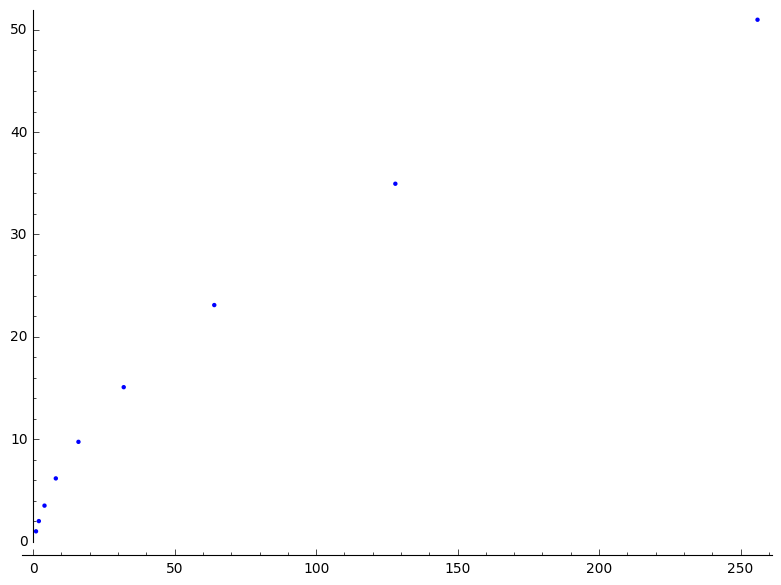

In [20]:
sum(point((i,moy_prof(i))) for i in [1,2,4,8,16,32,64,128,256])

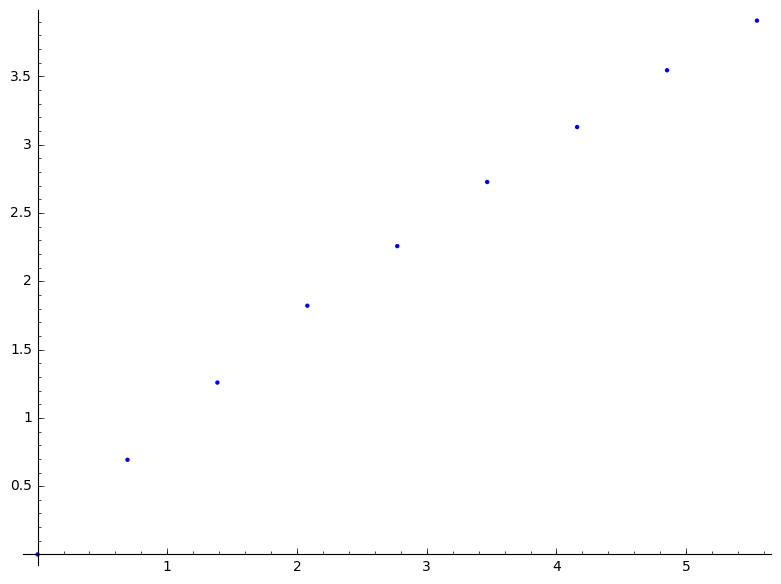

In [21]:
sum(point((log(i),log(moy_prof(i)))) for i in [1,2,4,8,16,32,64,128,256])

In [22]:
[(log(1.*i),log(moy_prof(i))) for i in [1,2,4,8,16,32,64,128,256]]

[(0.000000000000000, 0.000000000000000),
 (0.693147180559945, 0.693147180559945),
 (1.38629436111989, 1.28923264827676),
 (2.07944154167984, 1.83577635464483),
 (2.77258872223978, 2.25444471766611),
 (3.46573590279973, 2.76316950032329),
 (4.15888308335967, 3.13200989184654),
 (4.85203026391962, 3.55420455078733),
 (5.54517744447956, 3.88341774841781)]